In [152]:
#load modules
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [163]:
#BANKRUPTCY DATA / PARTISAN DATA

#load file
bankruptcy_path = "D:\\GroupProject1\\Statistics\\AACER_Bankrupty_by_State.csv"
partisan_path = "D:\\GroupProject1\\Statistics\\partisan.csv"

#Read the data and remove commas from numbers
bankruptcy = pd.read_csv(bankruptcy_path,  encoding = 'iso-8859-1', low_memory=False, skiprows = [0,1])
partisan = pd.read_csv(partisan_path, encoding = 'iso-8859-1', low_memory=False)
bankruptcy.head()

,Unnamed: 0,Cumulative 2020 Filings,7 Ratio,11 Ratio,13 Ratio,Total 7s,Total 11s,Total 13s,% Increase (or decrease) Current Month over Prior Month,Rank Based on Greatest % Increase Current Month over Prior Month,...,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167
0,Alabama,"15,699",43%,0.41%,57%,"6,746",65,"8,880",-12%,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,259,85%,2%,14%,220,4,35,-24%,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"11,155",84%,0.81%,15%,"9,418",90,"1,644",-4%,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"6,373",55%,0.41%,45%,"3,498",26,"2,839",-5%,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"43,008",83%,1%,16%,"35,799",441,"6,754",-3%,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Bankruptcy Cleanup
bankruptcy = bankruptcy.drop(bankruptcy.index[[51,52,56,57,58]])
#Rename column to State
bankruptcy = bankruptcy.rename(columns={"Unnamed: 0":'State'})


#retrieve only cumulative 2020 and Chapter11 filings
bankruptcy_filings = pd.DataFrame(bankruptcy[['State', 'Cumulative 2020 Filings', 'Total 11s']])                                 
bankruptcy_filings.head()


,State,Cumulative 2020 Filings,Total 11s
0,Alabama,"15,699",65
1,Alaska,259,4
2,Arizona,"11,155",90
3,Arkansas,"6,373",26
4,California,"43,008",441


In [165]:
#Partisan File cleanup
partisan_df = pd.DataFrame(partisan[['State','State Control']])
partisan_df.head()


,State,State Control
0,Alabama,Rep
1,Alaska,Rep
2,Arizona,Rep
3,Arkansas,Rep
4,California,Dem


In [184]:
#merge the 2 dataframes
bankruptcy_df = pd.merge(bankruptcy_filings,partisan_df, on='State',how='outer')
bankruptcy_df = bankruptcy_df.loc[(bankruptcy_df['Total 11s'] != '-')]
bankruptcy_df = bankruptcy_df.dropna()
bankruptcy_df.head()

,State,Cumulative 2020 Filings,Total 11s,State Control
0,Alabama,"15,699",65,Rep
1,Alaska,259,4,Rep
2,Arizona,"11,155",90,Rep
3,Arkansas,"6,373",26,Rep
4,California,"43,008",441,Dem


In [188]:
#count of state per state control
bankruptcy_df['State Control'].value_counts()

Rep        21
Dem        15
Divided    13
Name: State Control, dtype: int64

In [189]:
#max and min filings for graph limits
bankruptcy_df['Total 11s'] = bankruptcy_df['Total 11s'].str.replace(',','')

bankruptcy_df['Total 11s']= pd.to_numeric(bankruptcy_df['Total 11s'])
bankruptcy_df['Total 11s'].max(), bankruptcy_df['Total 11s'].min()

(1500, 1)

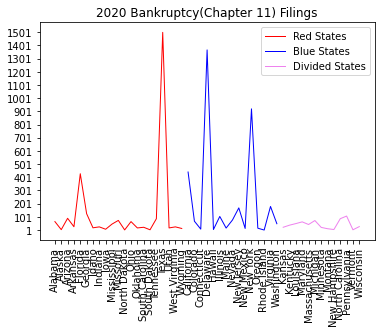

<Figure size 3600x288 with 0 Axes>

In [193]:
#line graph of x and y axis

#setting x axis 
repstate = bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Rep','State')]
demstate = bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Dem','State')]
divstate = bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Divided','State')] 

#setting x,y variable pairs (elevens and state)
repelevens, = plt.plot(repstate,bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Rep','Total 11s')], color= 'red', label = "Red States", linewidth=1) 
demelevens,  = plt.plot(demstate,bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Dem','Total 11s')], color= 'blue', label = "Blue States", linewidth=1) 
divelevens, = plt.plot(divstate, bankruptcy_df.loc[(bankruptcy_df['State Control'] =='Divided','Total 11s')], color= 'violet', label = "Divided States", linewidth=1) 


#setting properties 
plt.yticks(np.arange(round(bankruptcy_df['Total 11s'].min()), 
                     round(bankruptcy_df['Total 11s'].max())+ 20, 100))  
plt.xticks(rotation=90)
plt.title("2020 Bankruptcy(Chapter 11) Filings")  
#plt.invert_xaxis()

#set legend outside of box 
plt.legend(bbox_to_anchor=(1, 1),handles=[repelevens, demelevens, divelevens])
plt.figure(figsize=(50,4)) 
plt.tight_layout() 
plt.show()